# Problem 1

## Task 2

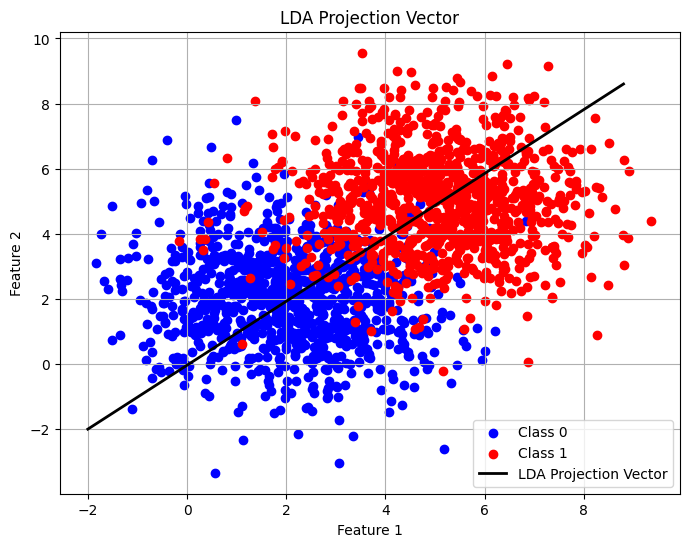

In [2]:
import matplotlib.pyplot as plt

# Compute LDA projection vector
w = GetLDAProjectionVector(X)

# Divide into class 0 and 1
c_0 = X[X[:, 2] == 0][:, :2].astype(float)
c_1 = X[X[:, 2] == 1][:, :2].astype(float)

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(c_0[:, 0], c_0[:, 1], color = 'blue', label='Class 0')
plt.scatter(c_1[:, 0], c_1[:, 1], color = 'red', label='Class 1')

# Plot LDA projection vector
plt.plot([-2, w[0]+8], [-2, w[1]+8], color='black', linewidth=2, label='LDA Projection Vector')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Projection Vector')
plt.legend()
plt.grid(True)
plt.show()

## Task 3

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].to_numpy() # Features
y = data.iloc[:, -1].to_numpy() # Labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train 1-NN classifier on original data
knnOriginal = KNeighborsClassifier(n_neighbors=1)
knnOriginal.fit(X_train, y_train)

# Make predictions using the test dataset
y_predOriginal = knnOriginal.predict(X_test)

# Calculate accuracy on original data
accOriginal = accuracy_score(y_test, y_predOriginal)

# Calculate projection vector using train data
trainDataWithLables = np.concatenate((X_train, y_train[:, np.newaxis]), axis=1)
w = GetLDAProjectionVector(trainDataWithLables)

# Project data using LDA projection vector
X_train_projected = np.dot(X_train, w)
X_test_projected = np.dot(X_test, w)

# Train 1-NN classifier on projected data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_projected.reshape(-1, 1), y_train)

# Make predictions using the test dataset
y_pred = knn.predict(X_test_projected.reshape(-1, 1))

# Compare the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original data:", accOriginal*100)
print("Accuracy on projected data:", accuracy*100)

Accuracy on original data: 89.0
Accuracy on projected data: 88.5


# Problem 2

## Task 0

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading and Splitting the dataset

In [21]:
url = 'https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/naive_bayes.csv'
data = pd.read_csv(url)

# Split the dataset
X = data.drop('Play', axis=1)
y = data['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=42)

print("Train set:")
print(X_train)
print("\nTrain set targets:")
print(y_train)
print("\nTest set:")
print(X_test)
print("\nTest set targets:")
print(y_test)

Train set:
     Outlook  Temp Humidity Windy
0      Rainy   Hot     High     f
12  Overcast   Hot   Normal     f
5      Sunny  Cool   Normal     t
8      Rainy  Cool   Normal     f
2   Overcast   Hot     High     f
1      Rainy   Hot     High     t
13     Sunny  Mild     High     t
4      Sunny  Cool   Normal     f
7      Rainy  Mild     High     f
10     Rainy  Mild   Normal     t
3      Sunny  Mild     High     f
6   Overcast  Cool   Normal     t

Train set targets:
0      no
12    yes
5      no
8     yes
2     yes
1      no
13     no
4     yes
7      no
10    yes
3     yes
6     yes
Name: Play, dtype: object

Test set:
     Outlook  Temp Humidity Windy
9      Sunny  Mild   Normal     f
11  Overcast  Mild     High     t

Test set targets:
9     yes
11    yes
Name: Play, dtype: object


## Task 1

### Calculating prior probabilities

In [6]:
# Calculate prior probabilities using train dataset
size = len(y_train)
play = y_train.value_counts()['yes']
notPlay = y_train.value_counts()['no']

# Calculate P(Play=yes) and P(Play=no)
pyes = play/size
pno = notPlay/size
print("Prior Probability of playing (P(Play=yes)): {:.2f}".format(pyes))
print("Prior Probability of not playing (P(Play=no)): {:.2f}".format(pno))

Prior Probability of playing (P(Play=yes)): 0.58
Prior Probability of not playing (P(Play=no)): 0.42


## Task 2

### Calculating likelihood probabilities

In [7]:
# Create a dictionary to store likelihood probabilities
likeProbs = {}

def likelihoodProbs(alpha):
    # Laplace smoothing parameter
    alpha = alpha

    # Iterate over each feature
    for feature in X_train.columns:
        # Iterate over each unique value of the feature
        for val in X_train[feature].unique():
            yesCount = ((X_train[feature] == val) & (y_train == 'yes')).sum() + alpha
            noCount = ((X_train[feature] == val) & (y_train == 'no')).sum() + alpha
            likeProbs[(feature, val, 'yes')] = yesCount / (play + alpha * len(X_train[feature].unique()))
            likeProbs[(feature, val, 'no')] = noCount / (notPlay + alpha * len(X_train[feature].unique()))

    for key, val in likeProbs.items():
        print("P({} = {} | Play = {}) = {:.2f}".format(key[0], key[1], key[2], val))

In [8]:
# Calculating likelihood probabilities without laplace smoothing
likelihoodProbs(0) # Pass the value of alpha as 0 to not use laplace smoothing

P(Outlook = Rainy | Play = yes) = 0.29
P(Outlook = Rainy | Play = no) = 0.60
P(Outlook = Overcast | Play = yes) = 0.43
P(Outlook = Overcast | Play = no) = 0.00
P(Outlook = Sunny | Play = yes) = 0.29
P(Outlook = Sunny | Play = no) = 0.40
P(Temp = Hot | Play = yes) = 0.29
P(Temp = Hot | Play = no) = 0.40
P(Temp = Cool | Play = yes) = 0.43
P(Temp = Cool | Play = no) = 0.20
P(Temp = Mild | Play = yes) = 0.29
P(Temp = Mild | Play = no) = 0.40
P(Humidity = High | Play = yes) = 0.29
P(Humidity = High | Play = no) = 0.80
P(Humidity = Normal | Play = yes) = 0.71
P(Humidity = Normal | Play = no) = 0.20
P(Windy = f | Play = yes) = 0.71
P(Windy = f | Play = no) = 0.40
P(Windy = t | Play = yes) = 0.29
P(Windy = t | Play = no) = 0.60


## Task 3

### Calculating posterior probabilities

In [9]:
# Create a dictionary to store posterior probabilities
postProbs = []

def posteriorProbs(alpha):

    # Laplace smoothing parameter
    alpha = alpha

    # Iterate over each sample in the test set
    for ind, sample in X_test.iterrows():
        # Initialize posterior probabilities with prior probabilities
        yesProb = pyes
        noProb = pno

        # Multiply the likelihood probability for each feature-value combination
        for feature, value in sample.items():
            yesProb *= likeProbs.get((feature, value, 'yes'), alpha / (pyes + alpha * len(X_train[feature].unique())))
            noProb *= likeProbs.get((feature, value, 'no'), alpha / (pno + alpha * len(X_train[feature].unique())))

        postProbs.append({'Play=yes': yesProb, 'Play=no': noProb})

    # Print Posterior Probabilities
    for ind, probs in enumerate(postProbs):
        print("Sample {}: Posterior Probability for (Play=yes): {:.4f}, Posterior Probability for (Play=no): {:.4f}".format(ind+1, probs['Play=yes'], probs['Play=no']))

In [10]:
# Calculating posterior probabilities without laplace smoothing
posteriorProbs(0) # Pass the value of alpha as 0 to not use laplace smoothing

Sample 1: Posterior Probability for (Play=yes): 0.0243, Posterior Probability for (Play=no): 0.0053
Sample 2: Posterior Probability for (Play=yes): 0.0058, Posterior Probability for (Play=no): 0.0000


## Task 4

### Predicting Outcome

In [11]:
def prediction():
    # Create a dictionary to store predictions
    preds = []

    # Choose the class with the highest posterior probability
    for probs in postProbs:
        pred = 'yes' if probs['Play=yes'] > probs['Play=no'] else 'no'
        preds.append(pred)

    for ind, pred in enumerate(preds):
        print("Sample {}: Predicted Outcome: {}".format(ind+1, pred))

In [12]:
# Predict the outcome
prediction()

Sample 1: Predicted Outcome: yes
Sample 2: Predicted Outcome: yes


In [13]:
# Make sure to empty the dictionaries before calling the functions again
likeProbs.clear()
postProbs.clear()

## Task 5

### Using laplace smoothing

In [14]:
likelihoodProbs(1) # alpha = 1

P(Outlook = Rainy | Play = yes) = 0.30
P(Outlook = Rainy | Play = no) = 0.50
P(Outlook = Overcast | Play = yes) = 0.40
P(Outlook = Overcast | Play = no) = 0.12
P(Outlook = Sunny | Play = yes) = 0.30
P(Outlook = Sunny | Play = no) = 0.38
P(Temp = Hot | Play = yes) = 0.30
P(Temp = Hot | Play = no) = 0.38
P(Temp = Cool | Play = yes) = 0.40
P(Temp = Cool | Play = no) = 0.25
P(Temp = Mild | Play = yes) = 0.30
P(Temp = Mild | Play = no) = 0.38
P(Humidity = High | Play = yes) = 0.33
P(Humidity = High | Play = no) = 0.71
P(Humidity = Normal | Play = yes) = 0.67
P(Humidity = Normal | Play = no) = 0.29
P(Windy = f | Play = yes) = 0.67
P(Windy = f | Play = no) = 0.43
P(Windy = t | Play = yes) = 0.33
P(Windy = t | Play = no) = 0.57


In [15]:
posteriorProbs(1)

Sample 1: Posterior Probability for (Play=yes): 0.0233, Posterior Probability for (Play=no): 0.0072
Sample 2: Posterior Probability for (Play=yes): 0.0078, Posterior Probability for (Play=no): 0.0080


In [16]:
prediction()

Sample 1: Predicted Outcome: yes
Sample 2: Predicted Outcome: no


In [17]:
# Make sure to empty the dictionaries before calling the functions again
likeProbs.clear()
postProbs.clear()